# Cars Price Prediction and eploratory Analysis
Import required libraries and functions

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
%matplotlib inline

- Reading through Pandas dataframe

In [10]:
dframe = pd.read_excel("cars_dataset.xlsx")

In [11]:
dframe.head()

,dataset__entity__entity_ticker__ticker__ticker,dataset__entity__name,url,as_of_date,domain,date_added,price,price_currency,image,vehicle_identification_number,...,model,mileage,region,stock_type,location_url,location_name,location_city,location_postal,dataset__entity__entity_ticker__ticker__market_sector,dataset__entity__entity_ticker__ticker__market_industry
0,nyse:kmx,www.carmax.com,http://www.carmax.com/enus/view-car/default.ht...,2015-10-05 04:00:00+00,www.carmax.com,2015-10-06 00:08:10.173641+00,21599,USD,http://img2.carmax.com/image/12346985/216/162,NaN,...,TSX,16000,"Columbia, SC",NaN,NaN,NaN,NaN,NaN,Consumer Services,General Retailers
1,nyse:kmx,www.carmax.com,http://www.carmax.com/enus/view-car/default.ht...,2015-10-05 04:00:00+00,www.carmax.com,2015-10-06 00:16:02.818833+00,14599,USD,http://img2.carmax.com/image/12377212/216/162,NaN,...,Dart SE,18000,"Los Angeles, CA",NaN,NaN,NaN,NaN,NaN,Consumer Services,General Retailers
2,nyse:kmx,www.carmax.com,http://www.carmax.com/enus/view-car/default.ht...,2015-10-05 04:00:00+00,www.carmax.com,2015-10-06 00:08:10.183941+00,33998,USD,http://img2.carmax.com/image/12141829/216/162,NaN,...,FJ Cruiser,18000,"Houston, TX",NaN,NaN,NaN,NaN,NaN,Consumer Services,General Retailers
3,nyse:kmx,www.carmax.com,http://www.carmax.com/enus/view-car/default.ht...,2015-10-05 04:00:00+00,www.carmax.com,2015-10-06 00:16:02.822888+00,19599,USD,http://img2.carmax.com/image/12271909/216/162,NaN,...,Camry SE,5000,"Tinley Park, IL",NaN,NaN,NaN,NaN,NaN,Consumer Services,General Retailers
4,nyse:kmx,www.carmax.com,http://www.carmax.com/enus/view-car/default.ht...,2015-10-05 04:00:00+00,www.carmax.com,2015-10-06 00:08:10.194298+00,14998,USD,http://img2.carmax.com/image/11951142/216/162,NaN,...,Accord EX-L,56000,"Hillside, IL",NaN,NaN,NaN,NaN,NaN,Consumer Services,General Retailers


### - Dropping Unnecessary columns -

In [12]:
dframe.columns

Index(['dataset__entity__entity_ticker__ticker__ticker',
       'dataset__entity__name', 'url', 'as_of_date', 'domain', 'date_added',
       'price', 'price_currency', 'image', 'vehicle_identification_number',
       'year', 'make', 'model', 'mileage', 'region', 'stock_type',
       'location_url', 'location_name', 'location_city', 'location_postal',
       'dataset__entity__entity_ticker__ticker__market_sector',
       'dataset__entity__entity_ticker__ticker__market_industry'],
      dtype='object')

In [13]:
dframe.drop(['dataset__entity__entity_ticker__ticker__ticker',
             'dataset__entity__name', 'url', 'domain', 'price_currency',
            'image', 'vehicle_identification_number', 'stock_type',
             'location_url', 'location_name', 'location_city',
             'location_postal', 'dataset__entity__entity_ticker__ticker__market_sector',
             'dataset__entity__entity_ticker__ticker__market_industry',
             'as_of_date', 'date_added'
            ], axis=1, inplace=True)

### Plotting Correlation matrix graph

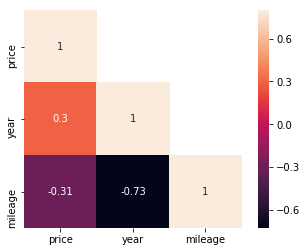

In [14]:
corrMatt = dframe.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

### Cleansed dataset for prediction

In [15]:
dframe.head()

,price,year,make,model,mileage,region
0,21599,2012,Acura,TSX,16000,"Columbia, SC"
1,14599,2013,Dodge,Dart SE,18000,"Los Angeles, CA"
2,33998,2014,Toyota,FJ Cruiser,18000,"Houston, TX"
3,19599,2014,Toyota,Camry SE,5000,"Tinley Park, IL"
4,14998,2009,Honda,Accord EX-L,56000,"Hillside, IL"


### Checking for null Values
- Null values can be imputed, if present. In this case, no null values are found

In [16]:
dframe.isnull().any()

price      False
year       False
make       False
model      False
mileage    False
region     False
dtype: bool

### Which company make expensive cars?

[]

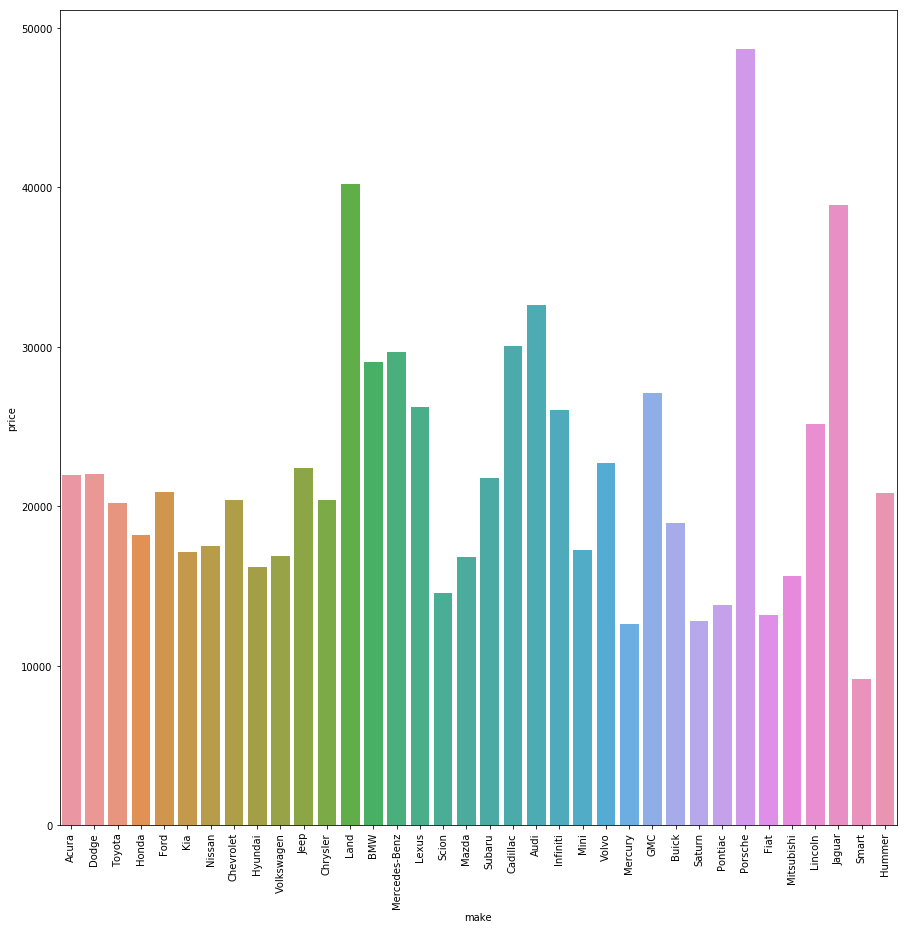

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
g=sns.barplot(x="make", y="price", data=dframe, ci=None, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.plot()

### Trend of Price throughout years

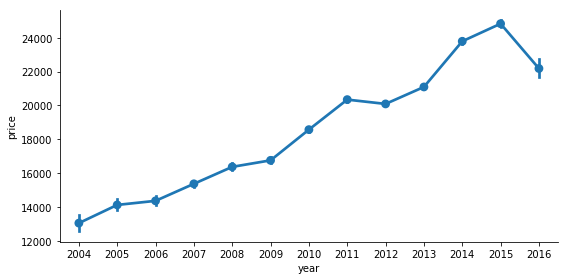

In [18]:
sns.factorplot(x="year", y="price", data=dframe, size=4, aspect=2)

### Feature Extraction:
- converting records to dictionary like {"year": 2015, "make":"toyota", "mileage":22000, "region":"Columbia, SC"}<br>
    we are converting records to dictionary to feed into Feature Hasher
- What does Feature Hasher do?<br>
    This class turns sequences of symbolic feature names (strings) into scipy.sparse matrices, using a hash function to compute the matrix column corresponding to a name. The hash function employed is the signed 32-bit version of Murmurhash3.
- Training and Test Data split<br>
    Training Data Size: 70%<br>
    Test Data Size: 30%

In [19]:
records_x = dframe.drop('price', axis=1).to_dict('records')
records_y = dframe.price.tolist()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(records_x, records_y, test_size=0.3, random_state=0)

In [21]:
vectorizer = FeatureHasher()
vectorizer.fit(x_train)

FeatureHasher(alternate_sign=True, dtype=<class 'numpy.float64'>,
       input_type='dict', n_features=1048576, non_negative=False)

In [22]:
records_x_trans = vectorizer.fit_transform(x_train)

### Model Fitting
- In this notebook, we have implemented model fitting via <b>Linear Regression</b>

In [28]:
regressor = LinearRegression(normalize=True)
regressor.fit(records_x_trans, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [29]:
y_pred = regressor.predict(vectorizer.transform(x_test))
y_true = y_test

#### Regression Score is neagtive is clear indication of bias. 

In [33]:
regressor.score(vectorizer.transform(x_test), y_test)

-18.145093165776395

In [31]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_pred, y_true))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_pred, y_true))

Mean squared error: 1228429862.49
Variance score: 0.05


Conclusion Notes:<br>
- Bias and Variance tradoff is obvious if implementing Linear Regression on Non-Linear dataset
- Without normalizing the dataset, Variance will increase else Bias will! That's why Bias-Variance tradoff exists
- Recommended Regression Trees on Non-Linear Dataset, RegressionTrees may give good results on this dataset.